## Задание 1. Модели выстрела вертикально вверх

### Модель №1

С поверхности Луны произведен выстрел тела массой 1 кг вертикально вверх со скоростью $100$ м/c. На тело действует только сила тяжести. Ускорение свободного падения $g = 1.6$ м/c$^2$. Найти:

1) Время $t_{max}$, которое потребуется телу для достижения максимальной высоты.

2) Время $t_{back}$, которое будет затрачено до возвращения тела обратно на поверхность.

3) Максимальную высоту $h_{max}$, которую достигнет тело.

### План действий

Задача заключается в определении неизвестного закона изменения скорости объекта $v$ с течением времени $t$, а также в определении неизвестного закона изменения высоты для объекта $h$ с течением времени $t$.

Необходимо выполнить следующие шаги:

1) Составляем дифференциальное уравнение с использованием второго закона Ньютона $m \dfrac{dv}{dt}=F$, где $F$ это сумма всех приложенных к телу сил с учетом направления движения. В условии задачи указано, что на тело действует только одна сила - сила тяжести, которая направлена против направления движения тела. Важно отметить, что необходимо сформулировать задачу Коши и выделить только одно решение, зная, что в нулевой момент времени скорость тела составляла $100$ м/c.

2) Решив составленное дифференциальное уравнение получаем закон изменения скорости тела $v(t)$. Зная закон изменения скорости можно найти время когда скорость тела станет равна $0$. Это ответ на второй вопрос. Также это время можно использовать в дальнейшем для получения ответа на первый вопрос.

3) Поскольку $v = \dfrac{ds}{dt}$ можно составить второе дифференциальное используя функцию $v(t) = f(t)$ и заменив $v(t)$ на $\dfrac{ds}{dt}$. При этом также составить задачу Коши с использованием условия нулевой высоты в нулевой момент времени. Решив уравнение получим закон изменения высоты для тела.

4) Зная закон изменения высоты, представленный как функция $h(t) = F(t)$, можно найти максимальную высоту найдя максимум функции или подставив в функцию время, когда скорость тела станет равной нулю. Таким образом получим ответ на первый вопрос.

5) Полное время движения тела можно найти исходя из вида функции изменения высоты или решив соответствующие уравнение, т.е. найдя время, когда высота равна $0$.

Для задачи можно сразу составить ДУ второго порядка относительно закона изменения высоты с течением времени.

\begin{align}
\left\{
        \begin{array}{l}
        \displaystyle m \ddot h = -m g, \\
        \displaystyle h(0) = 0, \\
        \displaystyle h'(0) = 100.
        \end{array}
        \right.
\end{align}

In [15]:
import sympy as sp

t = sp.symbols('t', real=True)
g = sp.Rational(16, 10)
v0 = 100

In [16]:
v = v0 - g*t # v'=-g
v

100 - 8*t/5

In [17]:
h = sp.integrate(v, (t, 0, t))
h_simpl = sp.simplify(h)

h_simpl

4*t*(125 - t)/5

In [18]:
t_max = sp.solve(sp.Eq(v, 0), t)[0]
t_max

125/2

In [19]:
t_back = [sol for sol in sp.solve(sp.Eq(h_simpl, 0), t) if sol!=0][0]
t_back

125

In [20]:
h_max = h_simpl.subs(t, t_max)
h_max

3125

### Модель №2

С поверхности Луны произведен выстрел тела массой 1 кг вертикально вверх со скоростью $100$ м/c. На тело действует две силы: сила тяжести и сила сопротивления атмосферы, которая пропорциональна скорости движения тела с коэффициентом сопротивления $k=0.01$ кг/c. Ускорение свободного падения $g = 1.6$ м/c$^2$. Найти:

1) Время $t_{max}$, которое потребуется телу для достижения максимальной высоты.

2) Время $t_{back}$, которое будет затрачено до возвращения тела обратно на поверхность.

3) Максимальную высоту $h_{max}$, которую достигнет тело.

In [21]:
k = 0.01
A = v0 + g/k
v = -g/k + A * sp.exp(-k*t)
v

-160.0 + 260.0*exp(-0.01*t)

In [22]:
h = sp.integrate(v, (t, 0, t))
h_simpl = sp.simplify(h)
h_simpl

-160.0*t + 26000.0 - 26000.0*exp(-0.01*t)

In [23]:
t_max = sp.solve(sp.Eq(v, 0), t)[0]
t_max

48.5507815781701

In [24]:
t_back = [sol for sol in sp.solve(sp.Eq(h_simpl, 0), t) if sol>0][0]
t_back

106.458434463298

In [25]:
h_max = sp.simplify(h_simpl.subs(t, t_max))
h_max

2231.87494749279

### Модель №3

С поверхности Луны произведен выстрел тела массой 1 кг вертикально вверх со скоростью $100$ м/c. На тело действует две силы: сила тяжести и сила сопротивления атмосферы, которая пропорциональна *квадрату* скорости движения тела с коэффициентом сопротивления $k=0.01$ кг/м. Ускорение свободного падения $g = 1.6$ м/c$^2$. Найти:

1) Время $t_{max}$, которое потребуется телу для достижения максимальной высоты.

2) Время $t_{back}$, которое будет затрачено до возвращения тела обратно на поверхность.

3) Максимальную высоту $h_{max}$, которую достигнет тело.

In [26]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar

g = 1.6
k = 0.01
v0 = 100.0
h0 = 0.0

def system(t, y):
    h_val, v_val = y
    return [v_val, -g - k * v_val * abs(v_val)]

sol = solve_ivp(system, (0, 200), [h0, v0], dense_output=True)

# Функции для поиска корней
v_func = lambda T: sol.sol(T)[1]
h_func = lambda T: sol.sol(T)[0]

t_max = root_scalar(v_func, bracket=[0, 50]).root
t_back = root_scalar(h_func, bracket=[t_max, 200]).root
h_max = h_func(t_max)

print("t_max =", t_max)
print("t_back =", t_back)
print("h_max =", h_max)

t_max = 11.441958336147366
t_back = 33.32975402085996
h_max = 207.86137369547046


## Задание 2. Кривые преследования

Рассмотрим следующую задачу преследования. Мышь движется по кругу радиуса 1,
стартуя с точки $(1, 0)$. Закон её движения описывается формулами:
$$x_m(t) = \cos(t), \qquad y_m(t) = \sin(t).$$
Кошка начинает преследования из начала координат, т.е. $x(0) = 0$, $y(0) = 0$. В каждый момент времени её скорость направлена на мышь, а величина её скорости численно равна расстоянию от нее до мыши в данный момент времени. Таким образом, координаты кошки подчиняются следующим дифференциальным уравнениям:
$$\frac{dx}{dt} = x_m(t) - x(t), \qquad \frac{dy}{dt} = y_m(t) - y(t)$$

Выполните следующие шаги.
1. Решите эти два уравнения с указанными начальными условиями.
2. Постройте на одном графике траектории движения мыши и кошки (параметрический
график) для $t \in [0, 12]$.
3. Постройте анимацию (например, 100 кадров) движения мыши и кошки по параметру $t \in [0,12]$.
4. Повторите шаги выше для следующих траекторий движения мыши:
* $x_m(t) = (1 + t/20)\cos(t), \qquad y_m(t) = (1 + t/20)\sin(t)$;
* $x_m(t) = \cos(t), \qquad y_m(t) = \cos^2(t)$;
* $x_m(t) = \cos(3t), \qquad y_m(t) = \sin(4t)$.

In [27]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

def x_m(t):
    return np.cos(t)

def y_m(t):
    return np.sin(t)

def f(t, Y):
    x, y = Y
    return [
        x_m(t) - x,
        y_m(t) - y
    ]

t0, t1 = 0, 12
t_eval = np.linspace(t0, t1, 2000)

sol = solve_ivp(f, (t0, t1), [0, 0], t_eval=t_eval)

x_cat = sol.y[0]
y_cat = sol.y[1]
x_mouse = x_m(t_eval)
y_mouse = y_m(t_eval)

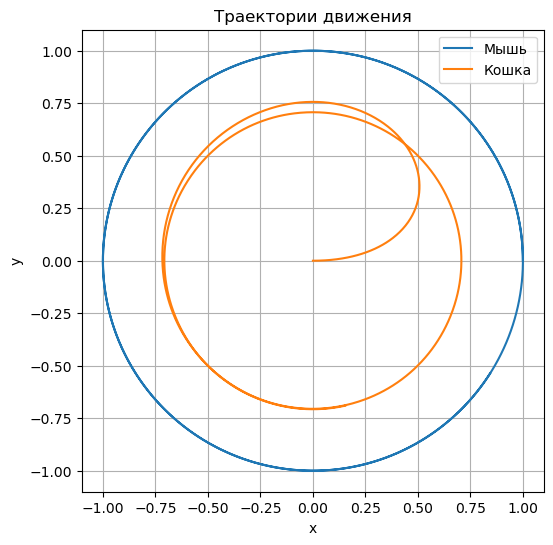

In [28]:
plt.figure(figsize=(6,6))
plt.plot(x_mouse, y_mouse, label='Мышь')
plt.plot(x_cat, y_cat, label='Кошка')
plt.gca().set_aspect('equal', 'box')
plt.title("Траектории движения")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


In [29]:
def x_m(t):
    return (1+t/20)*np.cos(t)

def y_m(t):
    return (1+t/20)*np.sin(t)

sol = solve_ivp(f, (t0, t1), [0, 0], t_eval=t_eval)

x_cat = sol.y[0]
y_cat = sol.y[1]
x_mouse = x_m(t_eval)
y_mouse = y_m(t_eval)

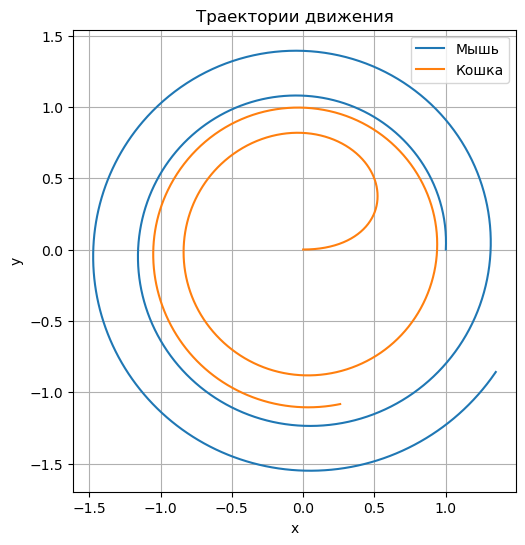

In [30]:
plt.figure(figsize=(6,6))
plt.plot(x_mouse, y_mouse, label='Мышь')
plt.plot(x_cat, y_cat, label='Кошка')
plt.gca().set_aspect('equal', 'box')
plt.title("Траектории движения")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [31]:
def x_m(t):
    return np.cos(t)

def y_m(t):
    return np.cos(t)**2

sol = solve_ivp(f, (t0, t1), [0, 0], t_eval=t_eval)

x_cat = sol.y[0]
y_cat = sol.y[1]
x_mouse = x_m(t_eval)
y_mouse = y_m(t_eval)

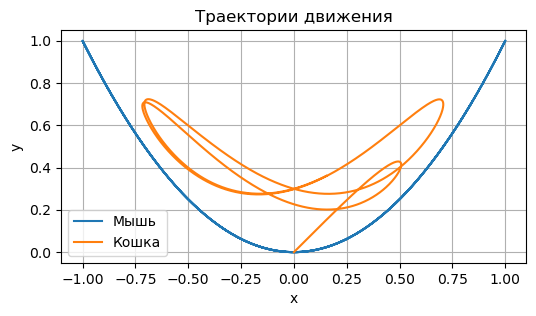

In [32]:
plt.figure(figsize=(6,6))
plt.plot(x_mouse, y_mouse, label='Мышь')
plt.plot(x_cat, y_cat, label='Кошка')
plt.gca().set_aspect('equal', 'box')
plt.title("Траектории движения")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [33]:
def x_m(t):
    return np.cos(3*t)

def y_m(t):
    return np.sin(4*t)

sol = solve_ivp(f, (t0, t1), [0, 0], t_eval=t_eval)

x_cat = sol.y[0]
y_cat = sol.y[1]
x_mouse = x_m(t_eval)
y_mouse = y_m(t_eval)

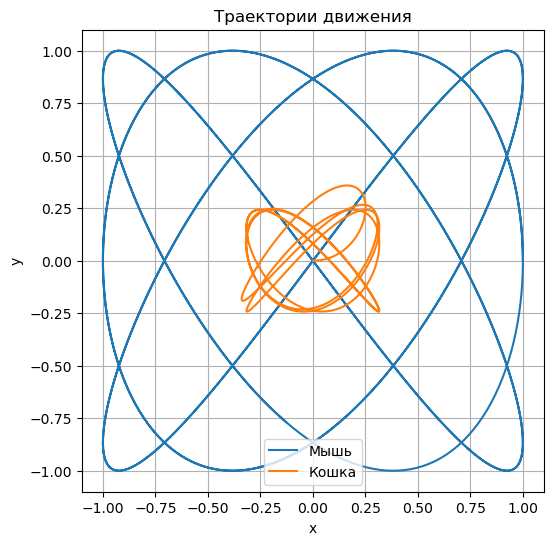

In [34]:
plt.figure(figsize=(6,6))
plt.plot(x_mouse, y_mouse, label='Мышь')
plt.plot(x_cat, y_cat, label='Кошка')
plt.gca().set_aspect('equal', 'box')
plt.title("Траектории движения")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## Задание 3. Кривые преследования для моделей выстрела вверх

Рассматривается задача вертикального выстрела вверх из задания 1, но с изменённым начальным условием: скорость в момент времени $t=0$ составляет 25 м/с. В момент выстрела стартует дрон, который находится на расстоянии 1000 метров от точки выстрела и движется с постоянной скоростью. Необходимо численно определить кривые преследования и требуемую скорость дрона для моделей выстрела 2 и 3 так, чтобы дрон достиг точки падения тела вместе с телом в одно и то же время.

Для модели 1 тело, движется по заранее известной траектории:
$$x_b(t) = 0, \qquad y_b(t) = v_0 t - \frac{1}{2} g t^2.$$
Дрон, который движется с постоянной скоростью $u$:
$$\dot x_d = u \frac{x_b - x_d}{\sqrt{(x_b - x_d)^2 + (y_b - y_d)^2}}, \qquad \dot y_d = u \frac{y_b - y_d}{\sqrt{(x_b - x_d)^2 + (y_b - y_d)^2}}.$$
Начальные условия:
$$x_b(0) = 0, \quad y_b(0) = 0, \quad x_d(0) = 1000, \quad y_d(0) = 0.$$

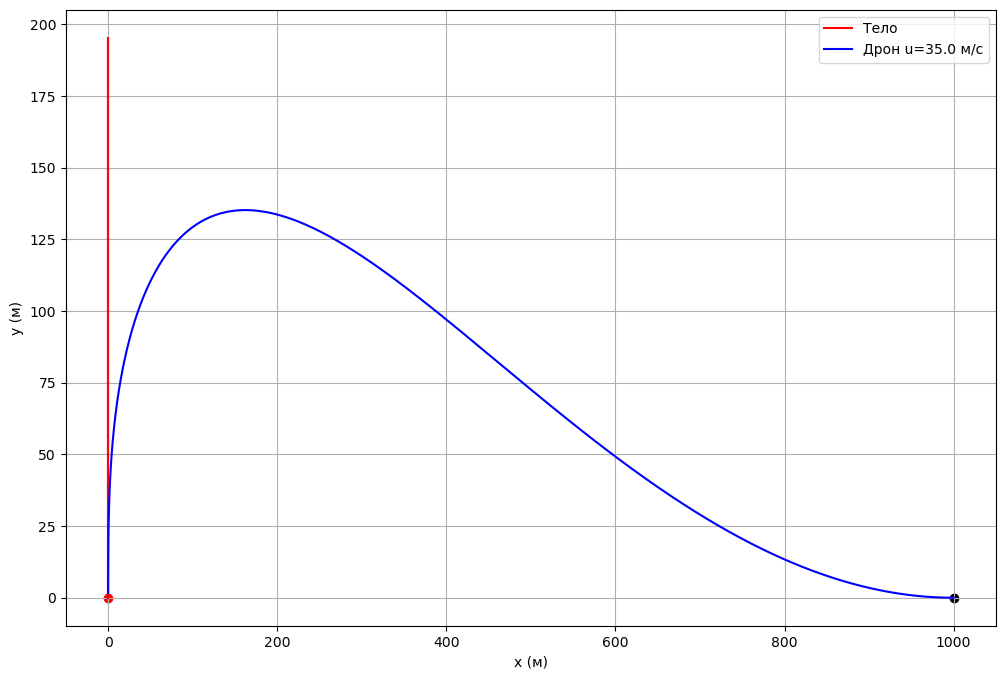

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
g = 1.6
v0 = 25.0
T = 2 * v0 / g

N = 1000
dt = T / (N - 1)
t = np.linspace(0, T, N)

# Траектория тела (аналитика)
x_body = np.zeros(N)
y_body = v0 * t - 0.5 * g * t**2

# Скорость дрона
u = 35.0

# Начальное положение дрона
xd, yd = [1000.0], [0.0]

# Метод Эйлера
for k in range(1, N):
    dx = x_body[k-1] - xd[-1]
    dy = y_body[k-1] - yd[-1]
    dist = np.hypot(dx, dy)
    vx, vy = u * dx / dist, u * dy / dist
    xd.append(xd[-1] + vx * dt)
    yd.append(yd[-1] + vy * dt)

plt.figure(figsize=(12, 8))
plt.plot(x_body, y_body, 'r-', label='Тело')
plt.plot(xd, yd, 'b-', label=f'Дрон u={u} м/с')
plt.scatter([0], [0], c='r')
plt.scatter([1000], [0], c='k')
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.legend()
plt.grid()
plt.show()

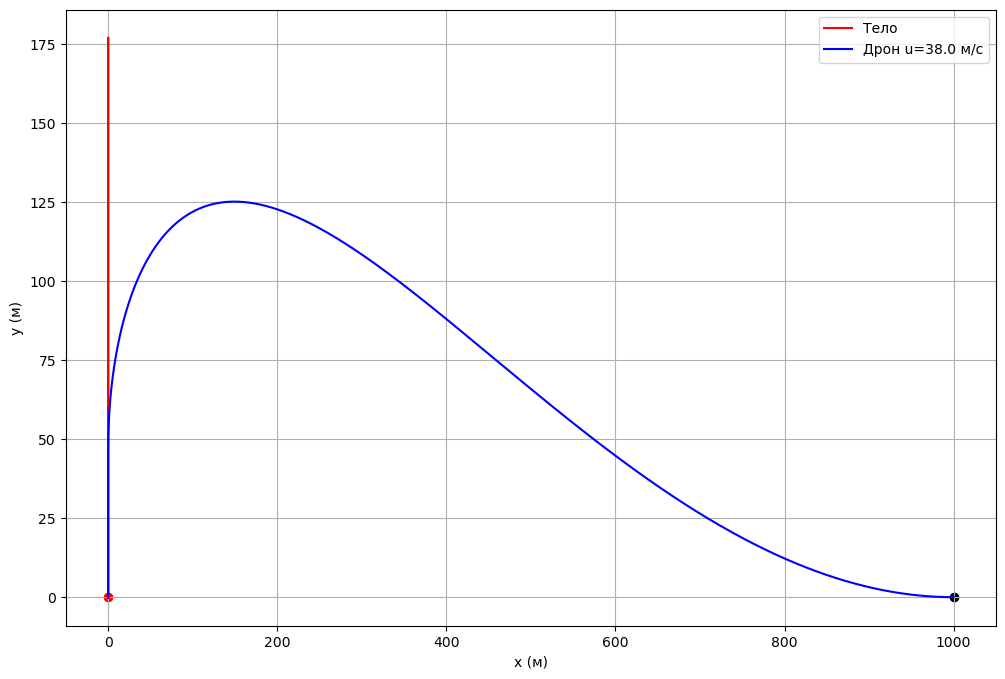

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

k = 0.01
v0 = 25.0
g = 1.6

dt = 0.01
t_list = [0]
v_list = [v0]
h_list = [0]

for i in range(200000):
    v = v_list[-1]
    h = h_list[-1]

    dv = -g - k * v
    v_new = v + dv * dt
    h_new = h + v_new * dt

    v_list.append(v_new)
    h_list.append(h_new)
    t_list.append(t_list[-1] + dt)

    if h_new <= 0 and i > 10:
        break

ts = np.array(t_list)
y_body = np.array(h_list)
N = len(ts)
dt = ts[1] - ts[0]

x_body = np.zeros(N)

# Скорость дрона
u = 38.0
# Начальное положение дрона
xd, yd = [1000.0], [0.0]

# Метод Эйлера
for k in range(1, N):
    dx = x_body[k-1] - xd[-1]
    dy = y_body[k-1] - yd[-1]
    dist = np.hypot(dx, dy)
    vx, vy = u * dx / dist, u * dy / dist
    xd.append(xd[-1] + vx * dt)
    yd.append(yd[-1] + vy * dt)

plt.figure(figsize=(12, 8))
plt.plot(x_body, y_body, 'r-', label='Тело')
plt.plot(xd, yd, 'b-', label=f'Дрон u={u} м/с')
plt.scatter([0], [0], c='r')
plt.scatter([1000], [0], c='k')
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.legend()
plt.grid()
plt.show()

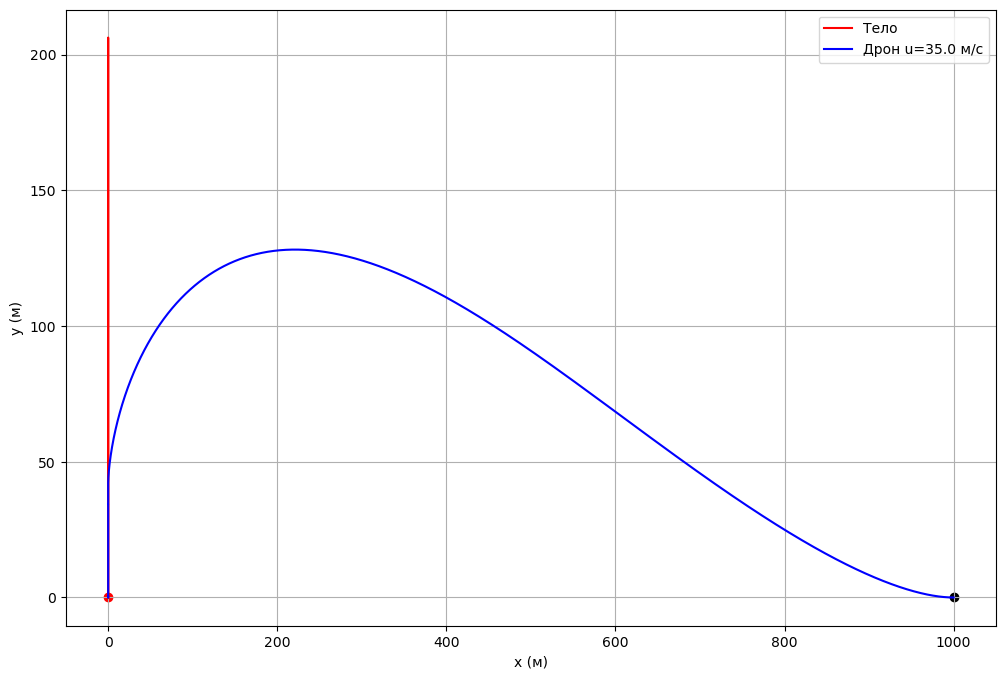

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
k = 0.01
v0 = 100.0
g = 1.6
dt = 0.01

t_list = [0]
v_list = [v0]
h_list = [0]

for i in range(200000):
    v = v_list[-1]
    h = h_list[-1]

    dv = -g - k * v * abs(v)
    v_new = v + dv * dt
    h_new = h + v_new * dt

    v_list.append(v_new)
    h_list.append(h_new)
    t_list.append(t_list[-1] + dt)

    if h_new <= 0 and i > 10:
        break


ts = np.array(t_list)
y_body = np.array(h_list)
N = len(ts)
dt = ts[1] - ts[0]
x_body = np.zeros(N)

u = 35.0

# Начальное положение дрона
xd, yd = [1000.0], [0.0]

# Метод Эйлера
for k in range(1, N):
    dx = x_body[k-1] - xd[-1]
    dy = y_body[k-1] - yd[-1]
    dist = np.hypot(dx, dy)

    vx = u * dx / dist
    vy = u * dy / dist

    xd.append(xd[-1] + vx * dt)
    yd.append(yd[-1] + vy * dt)

plt.figure(figsize=(12, 8))
plt.plot(x_body, y_body, 'r-', label='Тело')
plt.plot(xd, yd, 'b-', label=f'Дрон u={u} м/с')

plt.scatter([0], [0], c='r')
plt.scatter([1000], [0], c='k')

plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.legend()
plt.grid()
plt.show()